In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import pickle

In [2]:
gold_data=pd.read_csv('gld_price_data.csv')

In [3]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# Sample Data 


In [4]:
gold_data.shape

(2290, 6)

In [5]:
gold_data.head(10)
# plt.savefig("GoldPriceHead.png")

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180000,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285000,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167000,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053000,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590000,1.557099
5,1/9/2008,1409.130005,86.550003,75.250000,15.520000,1.466405
6,1/10/2008,1420.329956,88.250000,74.019997,16.061001,1.480100
7,1/11/2008,1401.020020,88.580002,73.089996,16.077000,1.479006
8,1/14/2008,1416.250000,89.540001,74.250000,16.280001,1.486900
9,1/15/2008,1380.949951,87.989998,72.779999,15.834000,1.480210


In [6]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
# Analysis 
# 1.+ve corelation
# 2. -ve corelation
correlation=gold_data.corr()

In [9]:
print(correlation)

              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


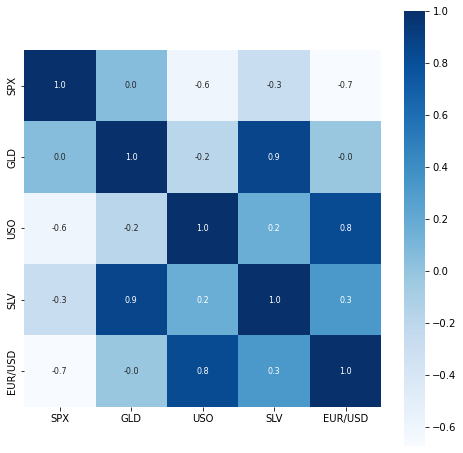

In [10]:
# constructing heatmap to understand correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,  cbar=True,  square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')
# sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')
plt.savefig('Heatmap.png')

In [11]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\yogit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


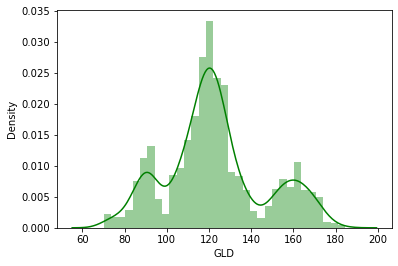

In [12]:
# Check the distribution of gld price
sns.distplot(gold_data['GLD'],color='green')
plt.savefig('Distribution_plot.png')

<AxesSubplot:xlabel='GLD', ylabel='Count'>

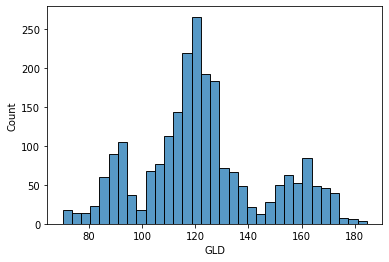

In [13]:
sns.histplot(gold_data.GLD)

In [14]:

# plt.figure(figsize=(12,10))
# sns.barplot(x=gold_data.drop(['GLD','Date'],axis=1),y=gold_data['GLD'])
# # xticks(rotation=45)
# # plt.show()

In [15]:
# making list of data variables
Date=[]
for col in gold_data.columns:
    if "2008" in col or "2015" in col:
        Date.append(col)
        
Date=set(Date)
Date

set()

In [16]:
plt.figure(figsize=(10,6))
for col in enumerate(Date):
    plt.subplot()
    plt.plot(gold_data.groupby(col)['GLD'].mean())
    plt.xlabel(col)
    plt.ylabel("Gold Price")

<Figure size 720x432 with 0 Axes>

In [17]:
# print(x)
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [18]:
# print(y)

In [19]:
# spliting into training and test data s
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [20]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [21]:
# Model training
regressor=RandomForestRegressor(n_estimators=100)

In [22]:
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [23]:
# model evaluation

# prediction test data

test_data_prediction=lr.predict(X_test)

# test_data_prediction=regressor.predict(X_train)

In [24]:
test_data_prediction

array([159.45290968,  81.50858067, 113.4868037 , 128.55153817,
       126.20403783, 141.31818338, 165.49416492, 124.44197659,
       113.95389904, 122.9965895 , 113.95492464, 174.89529849,
       132.66890174, 159.24793304, 118.8791679 , 122.14315717,
       150.37153054, 161.27175405, 152.2792036 , 162.19946709,
       145.88372183, 118.07669395, 180.21729122, 178.13331554,
       123.51701986,  98.82914322,  76.63486248, 119.38435511,
       113.85027665, 159.25706609,  93.76037617, 120.05334649,
        88.61086583, 114.28801659, 112.77954274, 144.19518102,
       118.78252489, 115.87334354, 144.06409553, 113.81864246,
       100.49676727,  89.42842238, 120.36720699, 110.47635305,
       146.4894628 , 119.30321261, 110.99311348, 111.3386287 ,
        96.48139076, 123.40842816,  79.51413425, 115.36111603,
       121.78896764, 114.55367722, 120.9074622 , 117.10612464,
       152.31198525, 182.7735091 , 196.73570503,  91.06670951,
       101.92097594,  87.48443506,  94.33158785, 119.17

In [25]:
# R_square error
error_score=metrics.r2_score(y_test,test_data_prediction)
print("R Squared erroe : ",error_score*100)
#

R Squared erroe :  86.57886565869237


In [26]:
y_test=list(y_test)

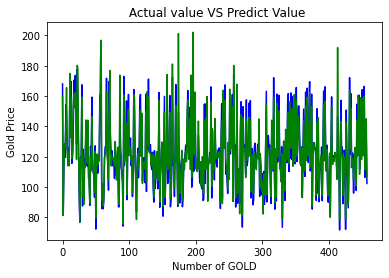

In [27]:
plt.plot(y_test,color='Blue',label='Actual')
plt.plot(test_data_prediction,color='green', label='Predect value')
plt.title(" Actual value VS Predict Value")
plt.xlabel('Number of GOLD')
plt.ylabel('Gold Price')
plt.savefig('notclose_value.png')

In [28]:
# sns.jointplot(x='Date',y='GLD',data=gold_data,kind=Tr)

C:\Users\yogit\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


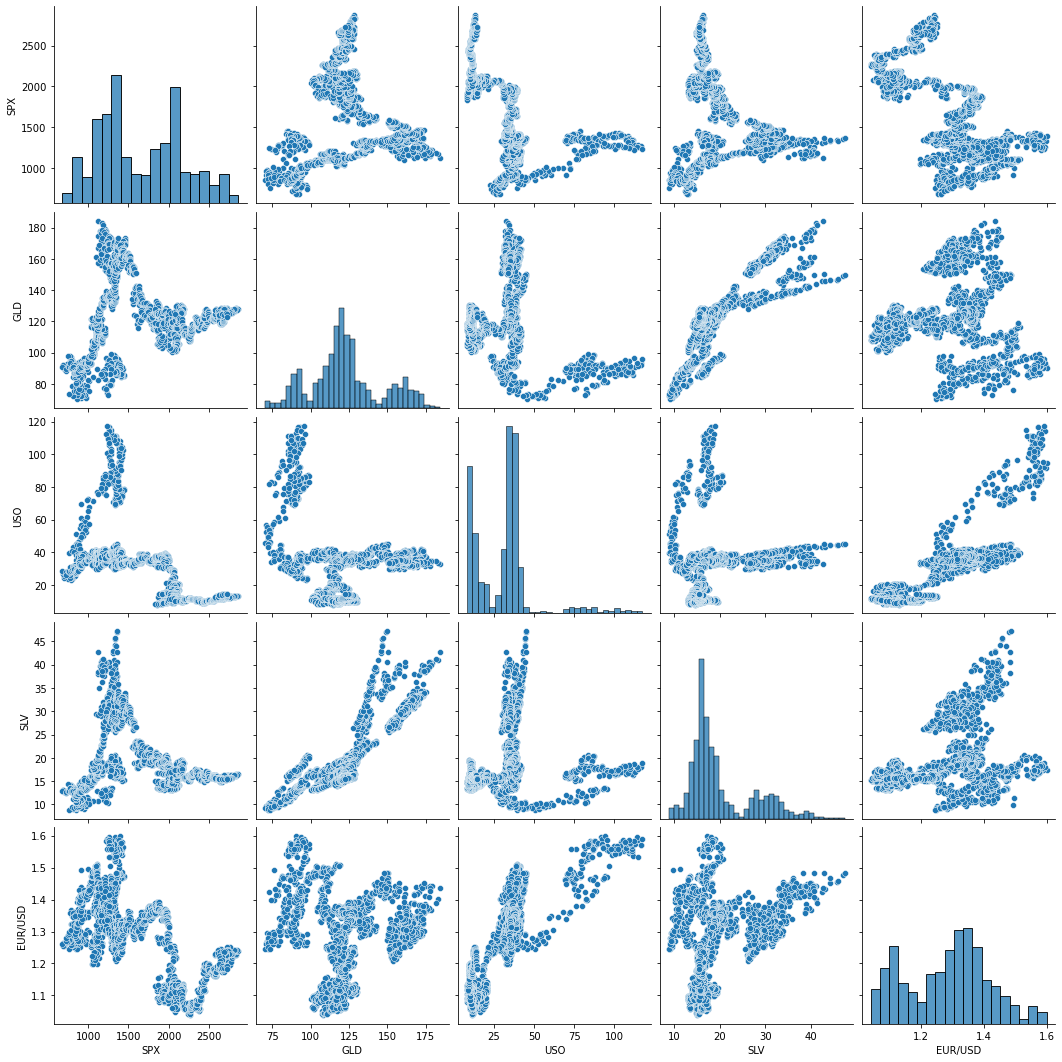

In [29]:
sns.pairplot(gold_data,size=3)
# plt.savefig("pairplot.png")

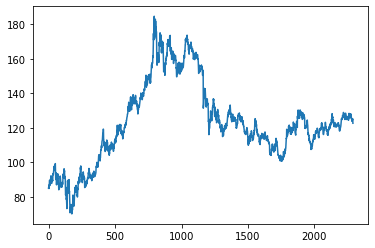

In [30]:
plt.plot(gold_data['GLD'])

C:\Users\yogit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GLD'>

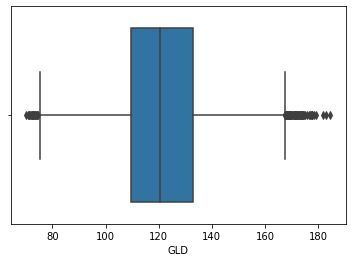

In [31]:
sns.boxplot( gold_data['GLD'])

In [32]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

In [33]:
test_pred = lr.predict(X_test)
train_pred = lr.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 5.91148673577776
MSE: 70.7889007972153
RMSE: 8.413614015226472
R2 Square 0.8657886565869237
__________________________________
Train set evaluation:
_____________________________________
MAE: 5.9378062764237445
MSE: 62.6895477486147
RMSE: 7.917673127163984
R2 Square 0.8850695972446934
__________________________________


In [34]:

test_pred = regressor.predict(X_test)
train_pred = regressor.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 1.3376714007641892
MSE: 5.512185571679833
RMSE: 2.34780441512487
R2 Square 0.9895492397482399
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.4924846620742356
MSE: 0.8431273339251715
RMSE: 0.9182196545082072
R2 Square 0.9984542724019864
__________________________________


In [36]:
saved_model = pickle.dump(regressor, open('Goldprice.pkl','wb'))